<a href="https://colab.research.google.com/github/jxxngho/HG_MLDL/blob/main/08_2_Image_classification_using_convolutional_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# 데이터 불러오기

# 전에 코드랑 다른 점 : 완전 연결 신경망에서는 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳐야 한다.
# 이 작업을 위해 reshape()와 Flatten 클래스를 사용 -> 합성곱 신경망은 2차원 이미지를 그대로 사용하기에 일렬로 펼치지 않는다.
# Conv2D를 사용하기 위해 깊이(채널) 추가해줘야함.
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1,28,28,1)/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

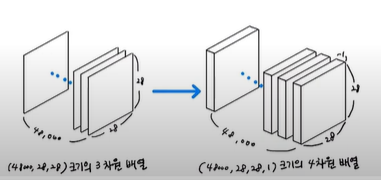

In [39]:
from keras.src.layers.rnn.simple_rnn import activations
# 전형적인 합성곱 신경망의 구조는 합성곱 층으로 이미지에서 특징을 감지한 후 밀집층으로 클래스에 따른 분류확률 계산

# Sequential 클래스의 객체 만들기
model = keras.Sequential()

# 1. 합성곱 층 추가 - 32개의 필터, kernel_size는 (3,3) 렐루 활성화 함수, 렐루 패딩 , 입력이미지 : (28,28,1)
model.add(keras.layers.Conv2D(32,kernel_size=3,
                              activation='relu',
                              padding='same',
                              input_shape=(28,28,1)))

# (28,28,32)

# 풀링층 추가 - (2,2)풀링 -> 데이터 절반으로 줄어듦
model.add(keras.layers.MaxPool2D(2))

# (14,14,32)

# 2. 합성곱 층 추가 + 풀링 층
model.add(keras.layers.Conv2D(64,kernel_size=3,
                              activation='relu',
                              padding='same'))

# (14,14,64)

# 풀링층 추가
model.add(keras.layers.MaxPool2D(2))

# (7,7,64)

# 3차원 특성 맵을 일렬로 펼치기 -> why? 마지막에 10개의 뉴런을 가진 (밀집) 출력층에서 확률을 계산하기 때문
# Flatten -> Dense 은닉층 -> Dense 출력층으로 구성

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))  # 과대적합 막기
model.add(keras.layers.Dense(10,activation='softmax'))

In [40]:
# 모델 요약
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_8 (Dense)             (None, 100)              

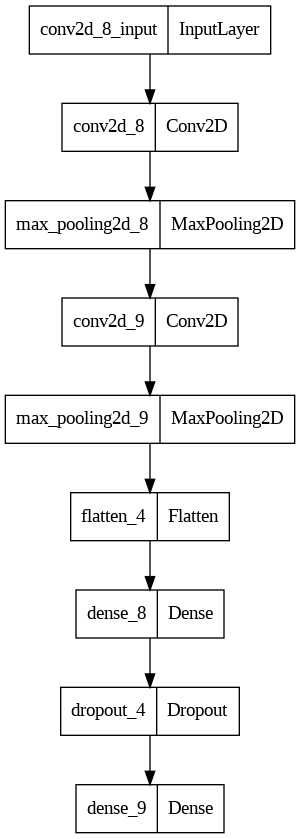

In [41]:
# 시각화 -> plot_model() 함수
keras.utils.plot_model(model)
# InputLayer : 케라스가 자동으로 추가하는 것 : 입력층의 역할 / 첫번째 Conv2D 클래스에 추가한 input_shape 매개변수로 사용

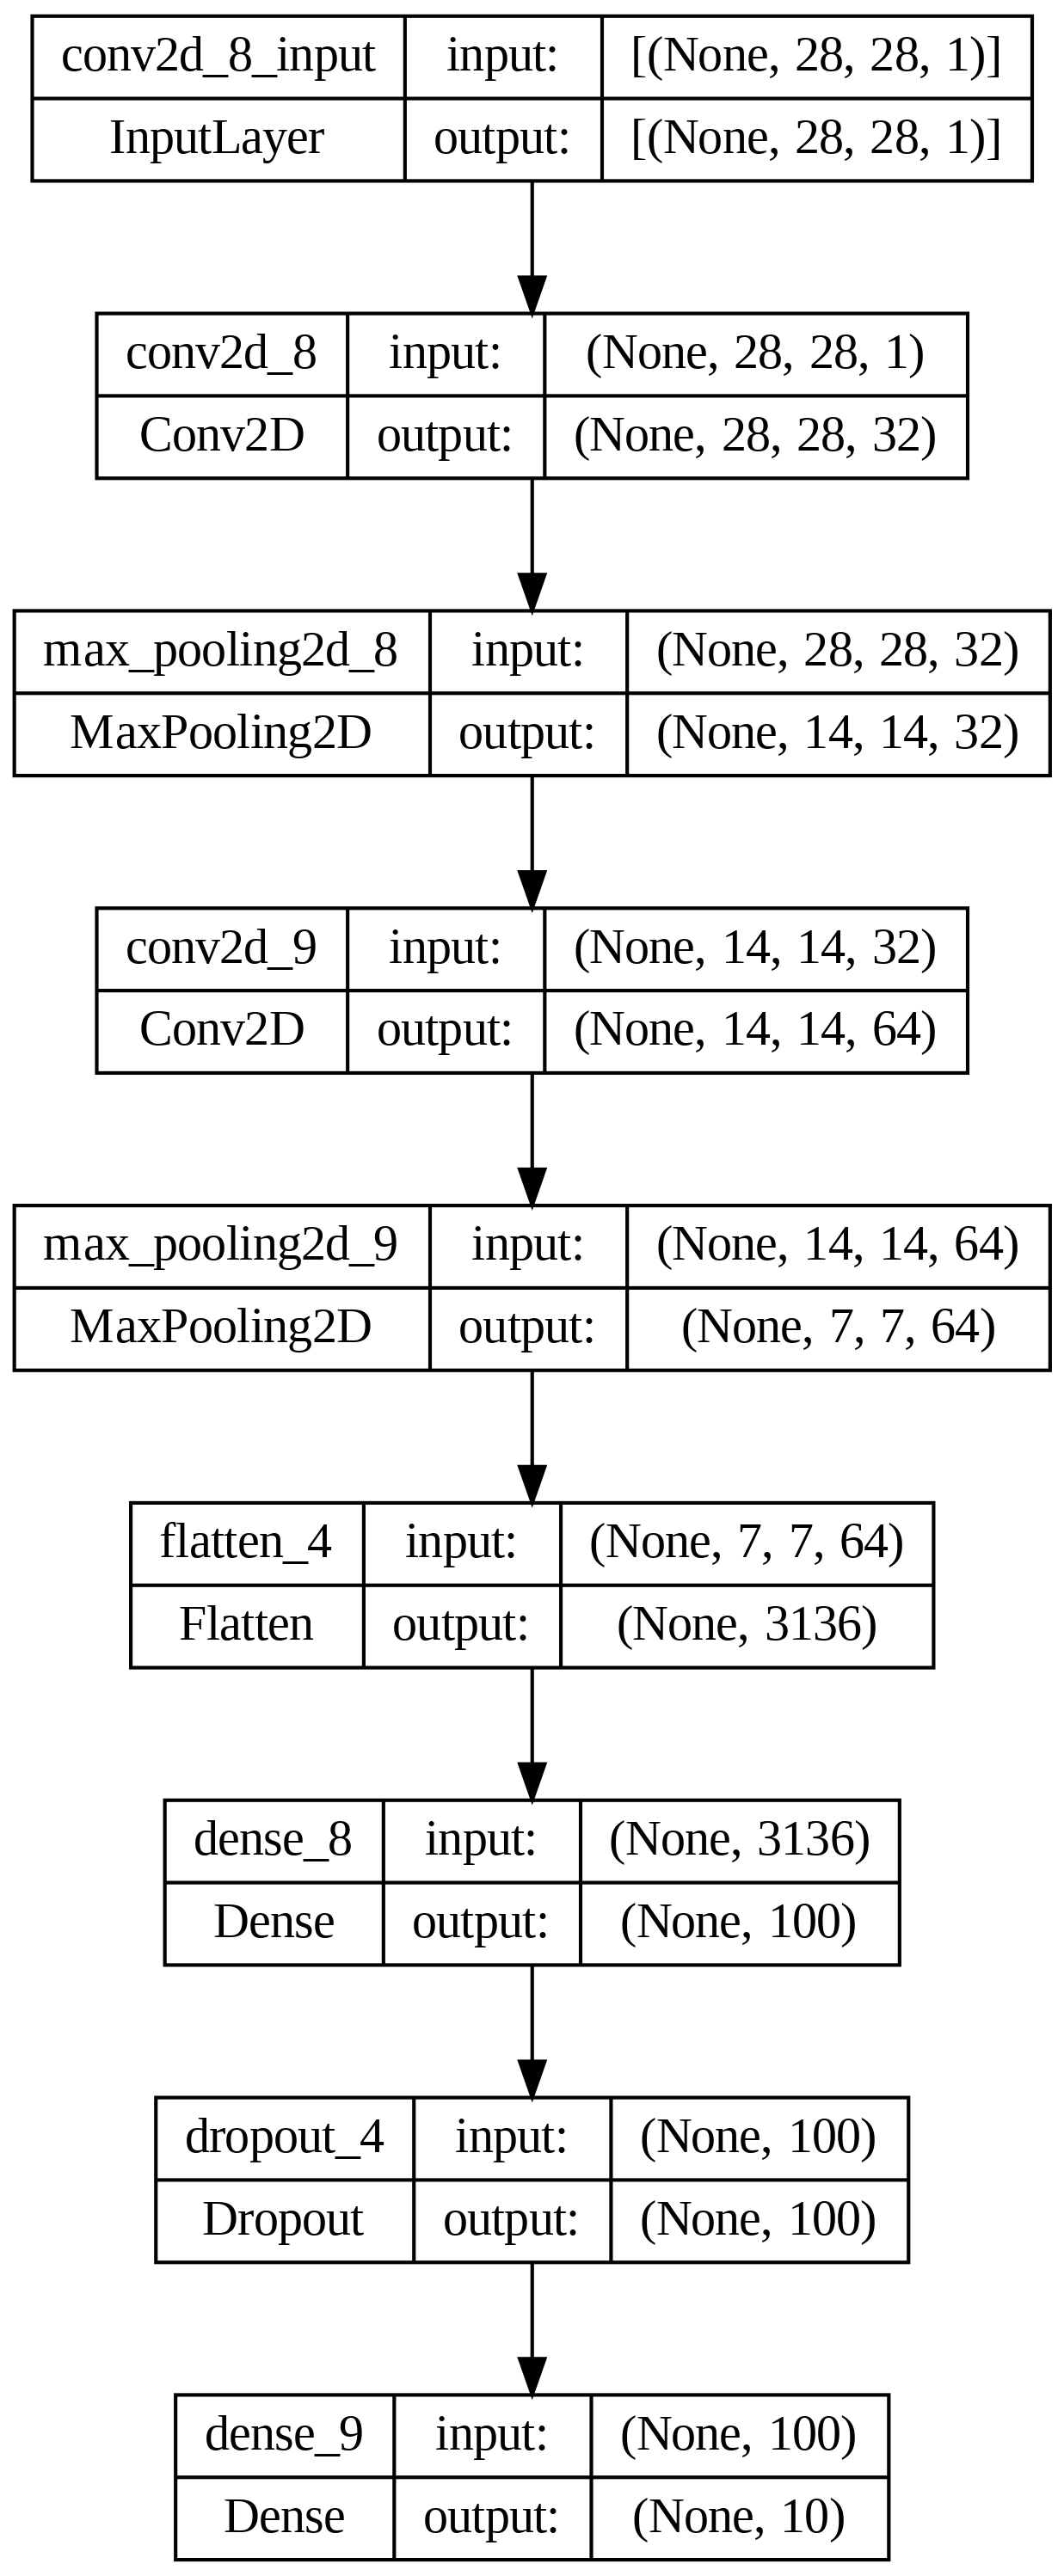

In [42]:
# plot_model()함수의 show_shapes 매개변수를 True로 설정하면 입력과 출력의 크기도 표시해줌.
# to_file 매개변수 : 출력한 이미지를 파일로 저장
# dpi 해상도 지정
keras.utils.plot_model(model,show_shapes=True, to_file = 'cnn.png', dpi=300)

그림

# 모델 컴파일과 훈련

In [43]:
# 케라스API의 장점은 딥러닝 모델의 종류나 구성 방식에 상관없이 컴파일과 훈련 과정이 같음.

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy') # metrics : 측정항목

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 10s 5ms/step - loss: 0.5367 - accuracy: 0.8053 - val_loss: 0.3524 - val_accuracy: 0.8662
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3591 - accuracy: 0.8708 - val_loss: 0.2837 - val_accuracy: 0.8905
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3111 - accuracy: 0.8869 - val_loss: 0.2659 - val_accuracy: 0.8996
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2797 - accuracy: 0.8990 - val_loss: 0.2568 - val_accuracy: 0.9028
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2551 - accuracy: 0.9073 - val_loss: 0.2401 - val_accuracy: 0.9078
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2339 - accuracy: 0.9138 - val_loss: 0.2308 - val_accuracy: 0.9143
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2159 - accuracy: 0.9212 - val_loss: 0.2342 - val_accuracy

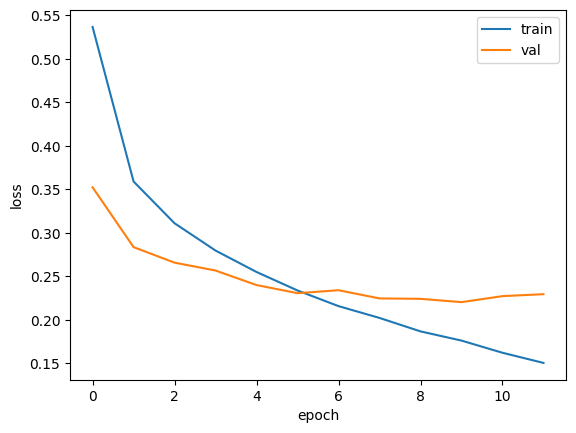

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

plt.show()

In [55]:
# 12번째에서 멈추고 10번째가 최소 (0부터 시작하니 9번째 )

In [56]:
# 검증세트에 대한 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2205 - accuracy: 0.9212


[0.22048521041870117, 0.9211666584014893]

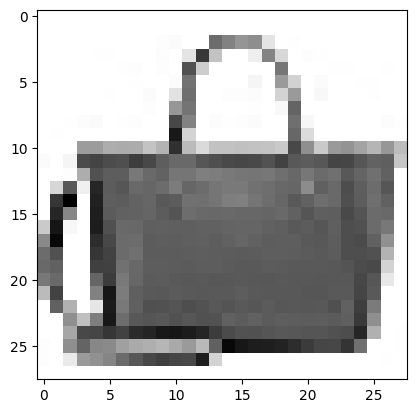

In [57]:
# predict() 메서드를 사용해 훈련된 모델을 사용하여 새로운 데이터를 예측 (편의상 검증 데이터 1번을 사용)
# 맷플롯립에서는 흑백 이미지에 깊이 차원이 없음 -> (28,28,1)을 (28,28)로 변경해줘야함

plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [58]:
preds = model.predict(val_scaled[0:1])
print(preds)

# 슬라이싱 쓴 이유 : 케라스의 fit, predict, evaluate 메서드는 모두 입력의 첫번째 차원이 배치 차원일꺼라 기대
# (28,28,1)이 아니라 (1,28,28,1)로 전달해야된다.
# 배열 슬라이싱은 인덱싱과 다르게 선택된 원소가 하나이더라도 전체 차원이 유지되어 (1,28,28,1)크기로 만듦.

1/1 [==============================] - 0s 22ms/step
[[2.9150242e-14 1.6229324e-21 7.5407579e-19 4.7938532e-20 5.8913494e-19
  2.7118680e-17 3.4745576e-17 1.8929789e-14 1.0000000e+00 7.6909314e-17]]


In [59]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [60]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [61]:
# 와우 !
# 마지막으로 테스트세트로 일반화 성능을 알아보자~
# 픽셀값의 범위를 0~1사이로 바꾸고 이미지 크기를 (28,28)-> (28,28,1)로 변경
test_scaled = test_input.reshape(-1,28,28,1)/255.0

# 성능 측정
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2508 - accuracy: 0.9140


[0.25081026554107666, 0.9139999747276306]

1/1 [==============================] - 0s 20ms/step
가방


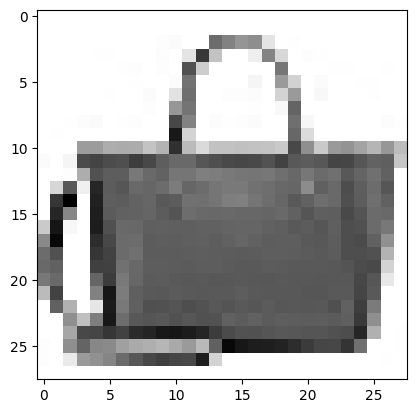

가방


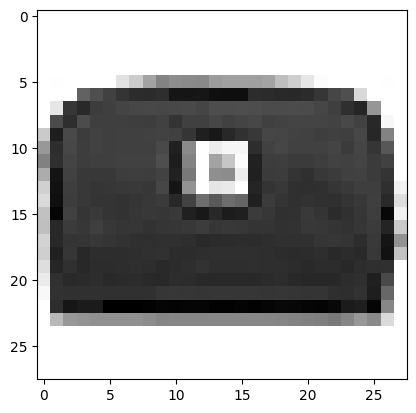

스니커즈


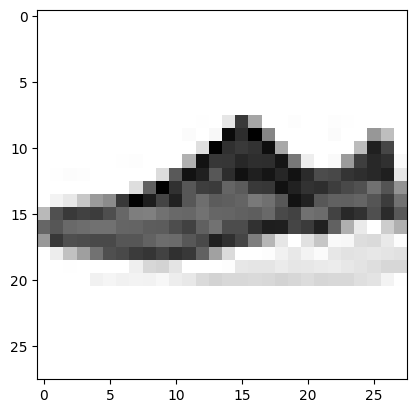

코트


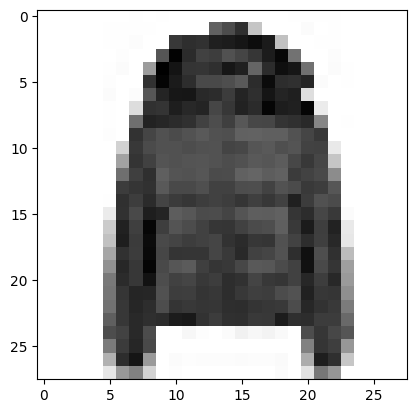

가방


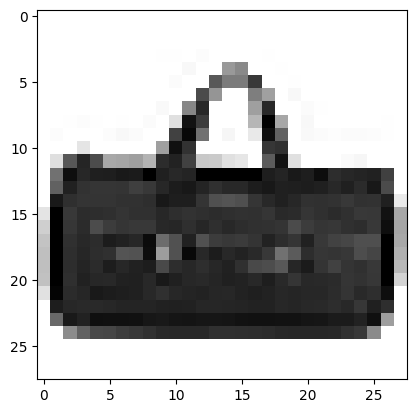

In [62]:
pred2 = model.predict(val_scaled[:5])
for i in range(0,5):
  print(classes[np.argmax(pred2[i])])
  plt.imshow(val_scaled[i:i+1].reshape(28,28),cmap='gray_r') #  array의 값들을 색으로 환산해 이미지의 형태로 보여준다.
  plt.show()

In [53]:
# 완전연결층은 과대적합되기 쉬운 반면은
# 합성곱층은 적은 개수의 파라미터로도 효과적으로 이미지의 특징을 잘 잡을수있음.